In [2]:
%pylab inline
import pandas
import sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path += ['/home/ubuntu/data-exploration-tools/python/']

In [4]:
from imp import reload
import cooking_tools
reload(cooking_tools)
from cooking_tools import *

In [5]:
TRAINFILE='/home/ubuntu/data/training_input.csv'
LABELFILE='/home/ubuntu/data/challenge_output_data_training_file_prediction_of_trading_activity_within_the_order_book.csv'

In [6]:
train_data = pandas.read_csv(TRAINFILE)

In [7]:
target = get_target(LABELFILE)

In [10]:
scores = compute_signal_accuracy_scores(two_sided_ema(train_data), target)    
print(scores.max())

0.699474126979


In [12]:
two_sided_ema??

In [21]:
nb_trade = get_data(train_data, 'nb_trade', 0)
X = np.vstack([nb_trade.shift(i).fillna(nb_trade).values for i in range(-50, 51)]).T

In [25]:
n_samples = X.shape[0]

In [29]:
X_train, X_test = X[:(n_samples/2), :], X[(n_samples/2):, :]
y_train, y_test = target[:(n_samples/2)], target[(n_samples/2):]

/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [30]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf = LogisticRegression(C=0.01)

In [46]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
(y_pred==y_test).mean()

0.70340284802474051

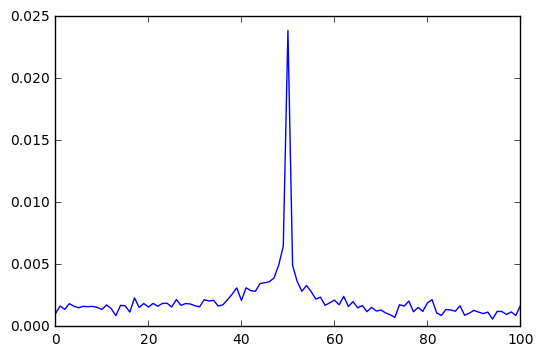

In [49]:
plt.plot(clf.coef_.ravel())